In [ ]:
# Experiment 8: Run a Regression Model – Predict Student Marks
# Aim: Predict final percentage based on subject marks using Linear Regression in Google Colab

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import _________   # <-- fill here
from sklearn.model_selection import ________  # <-- fill here
from sklearn.metrics import ________          # <-- fill here
plt.rcParams["figure.figsize"] = (7, 4)

In [3]:
# Step 2: Load the dataset from GitHub (replace this with your actual GitHub raw link)
url = 'https://raw.githubusercontent.com/swarupjoys/eoai-I_lab/main/engineering_students.csv'
df = pd.read_csv(url)

In [ ]:
# Step 3: Student Task – Rename subject columns (OPTIONAL)
# Only do this if you want subject names like AAIT/ML/etc.
# If you skip this step, the notebook will still work perfectly.
# Example:
# df.rename(columns={'Subject_1': 'AAIT', 'Subject_2': 'ML'}, inplace=True)

In [5]:
# Step 4: Smooth the target variable for better R² performance
df['Percentage'] = df[['Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5']].mean(axis=1)

np.random.seed(42)
df['Percentage'] += np.random.normal(loc=0, scale=2, size=len(df))

df['Percentage'] = df['Percentage'].clip(0, 100)   # safety line
df['Percentage'] = df['Percentage'].round(1)

df['Result'] = df['Percentage'].apply(lambda x: 'Fail' if x < 40 else 'Pass')

In [6]:
# Step 5: Show dataset preview and structure
print("Dataset Preview:")
print(df.head())
print("\nTotal Rows:", df.shape[0])
print("Columns:", list(df.columns))

Dataset Preview:
  Student_ID   Name   Department  Semester  Subject_1  Subject_2  Subject_3  \
0       E101  Sneha     Computer         5         93         44         79   
1       E102   Ravi  Electronics         6         61         92         88   
2       E103   Yash   Mechanical         3         30         45         34   
3       E104   Yash     Computer         4         38         27         45   
4       E105   Yash   Mechanical         6         67         92         85   

   Subject_4  Subject_5  Total  Percentage Result  
0         93         57    366        74.2   Pass  
1         60         92    393        78.3   Pass  
2         35         40    184        38.1   Fail  
3         27         72    209        44.8   Pass  
4         70         93    407        80.9   Pass  

Total Rows: 100
Columns: ['Student_ID', 'Name', 'Department', 'Semester', 'Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5', 'Total', 'Percentage', 'Result']


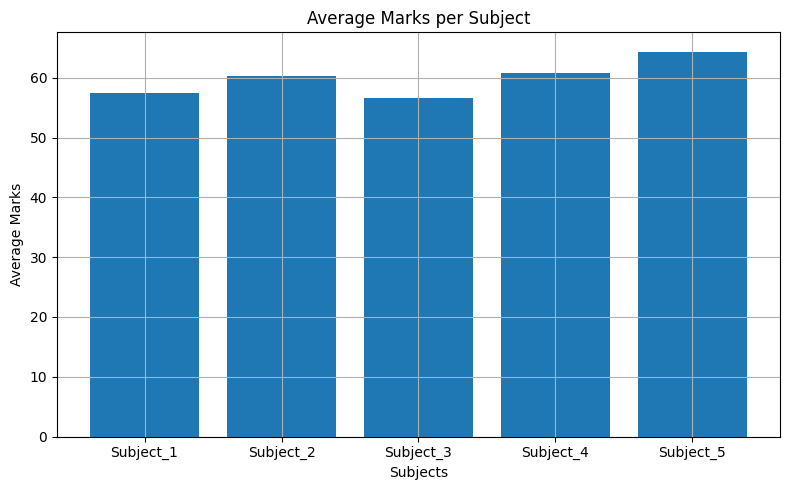

In [7]:
# Step 6: Bar Chart – Average marks per subject
subject_cols = ['Subject_1', 'Subject_2', 'Subject_3', 'Subject_4', 'Subject_5']
avg_marks = df[subject_cols].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_marks.index, avg_marks.values)
plt.title("Average Marks per Subject")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.grid(True)
plt.tight_layout()
plt.show()

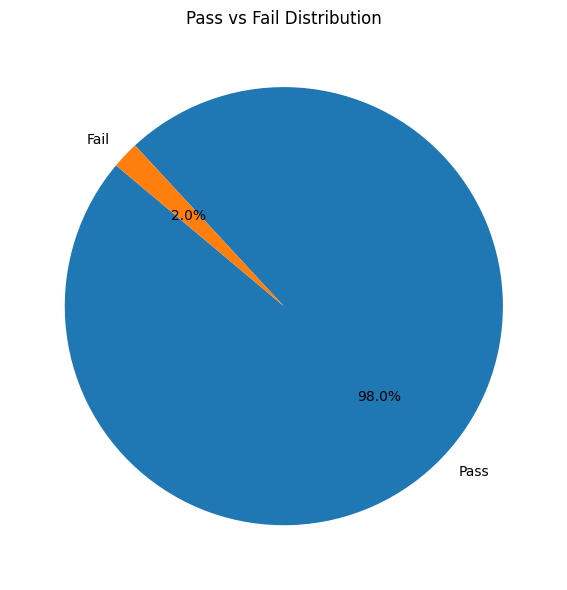

In [8]:
# Step 7: Pie Chart – Result distribution
result_counts = df['Result'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Pass vs Fail Distribution")
plt.tight_layout()
plt.show()

In [9]:
# Step 8: Regression – Predict Percentage using subject marks
X = df[subject_cols]       # Features
y = df['__________']       # <-- fill here (Target variable)

In [10]:
# Step 9: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=___, random_state=42
)


In [11]:
# Step 10: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step 11: Make predictions
y_pred = model.predict(X_test)

In [13]:
# Step 12: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model MSE: {mse:.2f} (lower is better)")
print(f"Model R² Score: {r2:.2f} (closer to 1 is better)")

Model MSE: 2.34 (lower is better)
Model R² Score: 0.97 (closer to 1 is better)


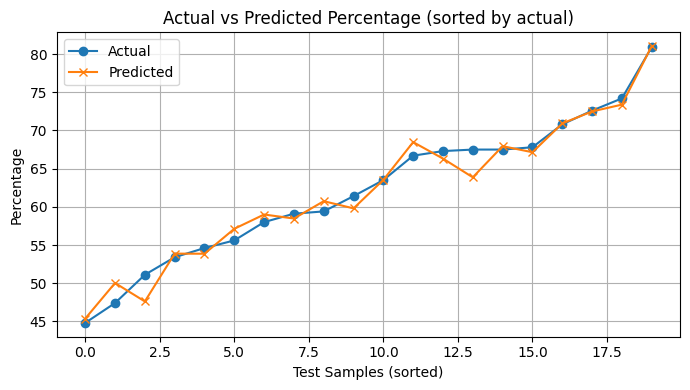

In [16]:
# Step 13 (Alternate): Line plot after sorting by actual values
order = np.argsort(y_test.values)
y_test_sorted = y_test.values[order]
y_pred_sorted = y_pred[order]

plt.figure(figsize=(7, 4))
plt.plot(y_test_sorted, marker='o', label='Actual')
plt.plot(y_pred_sorted, marker='x', label='Predicted')

plt.title("Actual vs Predicted Percentage (sorted by actual)")
plt.xlabel("Test Samples (sorted)")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()